In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from statsmodels.stats.contingency_tables import mcnemar
from statsmodels.stats.proportion import proportions_ztest

In [2]:
df = pd.read_csv('dataset.csv')
print(df.shape)
df = df.dropna()
print(df.shape)

df.rename(columns={
    'Comment': 'comment',
    'Control_Label': 'random',
    'True_Label': 'human',
    'Cluster_Label': 'cluster1',
    'LLM_Label': 'individual',
    'Half_Cluster_Label': 'cluster2',
}, inplace=True)

# df.head

(496, 6)
(496, 6)


In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   comment     496 non-null    object
 1   random      496 non-null    int64 
 2   human       496 non-null    int64 
 3   cluster1    496 non-null    int64 
 4   individual  496 non-null    int64 
 5   cluster2    496 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 23.4+ KB


comment       0
random        0
human         0
cluster1      0
individual    0
cluster2      0
dtype: int64

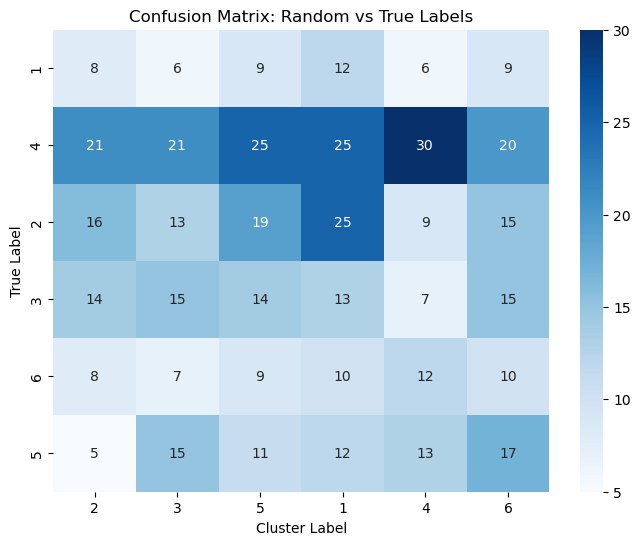

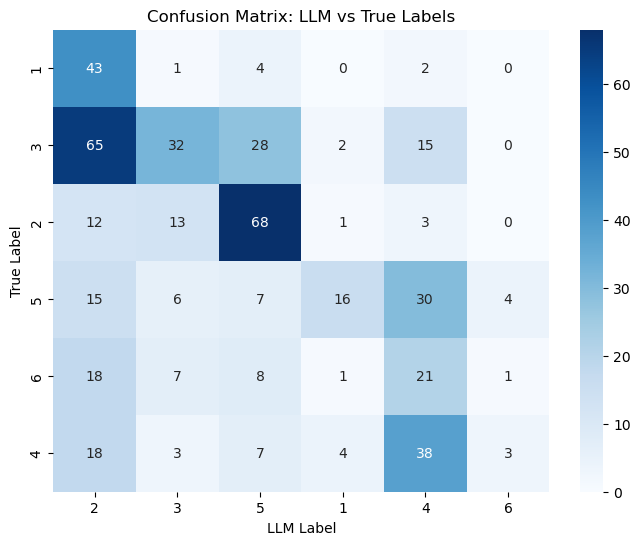

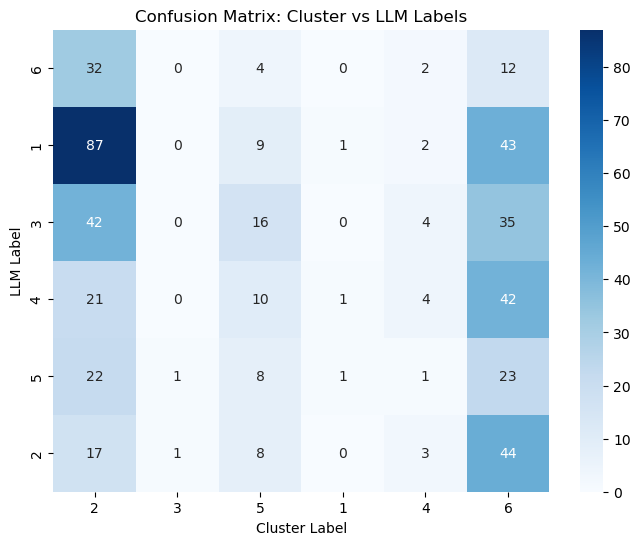

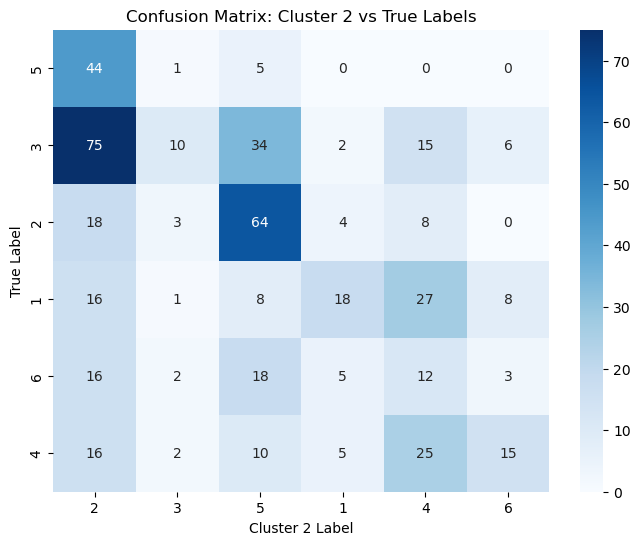

In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix for Cluster vs True Labels
cm_random_true = confusion_matrix(df['human'], df['random'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_random_true, annot=True, fmt='d', cmap='Blues', xticklabels=df['human'].unique(), yticklabels=df['random'].unique())
plt.title('Confusion Matrix: Random vs True Labels')
plt.xlabel('Cluster Label')
plt.ylabel('True Label')
plt.show()

# Confusion Matrix for LLM vs True Labels
cm_llm_true = confusion_matrix(df['human'], df['individual'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_llm_true, annot=True, fmt='d', cmap='Blues', xticklabels=df['human'].unique(), yticklabels=df['individual'].unique())
plt.title('Confusion Matrix: LLM vs True Labels')
plt.xlabel('LLM Label')
plt.ylabel('True Label')
plt.show()

# Confusion Matrix for Cluster vs LLM Labels
cm_cluster1_true = confusion_matrix(df['human'], df['cluster1'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cluster1_true, annot=True, fmt='d', cmap='Blues', xticklabels=df['human'].unique(), yticklabels=df['cluster1'].unique())
plt.title('Confusion Matrix: Cluster vs LLM Labels')
plt.xlabel('Cluster Label')
plt.ylabel('LLM Label')
plt.show()

# Chi-Square Test for Cluster 2 vs True Labels
cm_cluster2_true = pd.crosstab(df['human'], df['cluster2'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cluster2_true, annot=True, fmt='d', cmap='Blues', xticklabels=df['human'].unique(), yticklabels=df['cluster2'].unique())
plt.title('Confusion Matrix: Cluster 2 vs True Labels')
plt.xlabel('Cluster 2 Label')
plt.ylabel('True Label')
plt.show()

Class distribution for human:
human
2    0.286290
3    0.195565
4    0.157258
6    0.147177
5    0.112903
1    0.100806
Name: proportion, dtype: float64

Class distribution for random:
random
4    0.195565
3    0.175403
6    0.173387
2    0.155242
5    0.155242
1    0.145161
Name: proportion, dtype: float64

Class distribution for cluster1:
cluster1
1    0.445565
6    0.401210
3    0.110887
5    0.032258
4    0.006048
2    0.004032
Name: proportion, dtype: float64

Class distribution for individual:
individual
1    0.344758
3    0.245968
5    0.219758
2    0.125000
4    0.048387
6    0.016129
Name: proportion, dtype: float64

Class distribution for cluster2:
cluster2
1    0.372984
3    0.280242
5    0.175403
4    0.068548
6    0.064516
2    0.038306
Name: proportion, dtype: float64



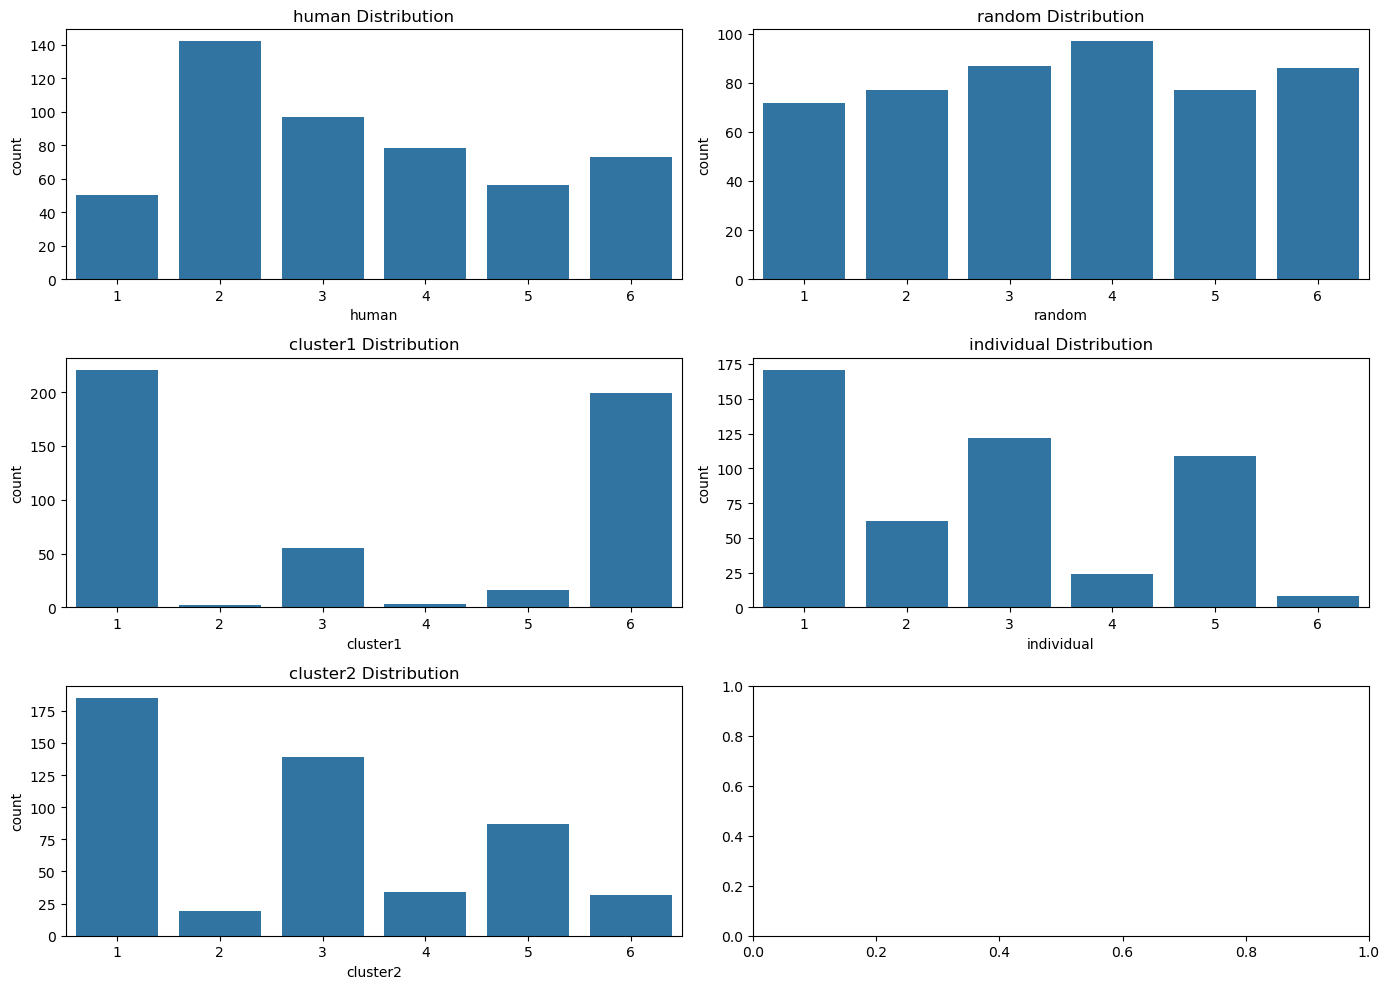

In [5]:
# Check class distribution for each label
label_columns = ['human', 'random', 'cluster1', 'individual', 'cluster2']
for col in label_columns:
    print(f"Class distribution for {col}:")
    print(df[col].value_counts(normalize=True))
    print()

# Plot the distribution of each label in a bar chart
fig, axes = plt.subplots(3, 2, figsize=(14, 10))
for i, col in enumerate(label_columns):
    ax = axes[i // 2, i % 2]
    sns.countplot(x=col, data=df, ax=ax)
    ax.set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()


In [6]:
# making the bigger df
df_main = df.copy()

label_mapping = {1: 1, 2: 1, 3: 1, 4: 2, 5: 2, 6: 2}
df_main['random'] = df_main['random'].map(label_mapping)
df_main['human'] = df_main['human'].map(label_mapping)
df_main['cluster1'] = df_main['cluster1'].map(label_mapping)
df_main['individual'] = df_main['individual'].map(label_mapping)
df_main['cluster2'] = df_main['cluster2'].map(label_mapping)

df_main.head()


,comment,random,human,cluster1,individual,cluster2
0,It was awesome,1,1,2,1,2
1,Supper songs brother,2,1,1,1,1
2,love you talha,1,1,2,1,1
3,this is not a song . this is some thing unique...,2,1,1,1,1
4,speechless,1,2,2,1,1


In [7]:
df_comparison_main = df[['random', 'human', 'cluster1', 'individual', 'cluster2']].copy()

df_comparison_main['random_correct'] = df_comparison_main['random'] == df_comparison_main['human']
df_comparison_main['cluster1_correct'] = df_comparison_main['cluster1'] == df_comparison_main['human']
df_comparison_main['individual_correct'] = df_comparison_main['individual'] == df_comparison_main['human']
df_comparison_main['cluster2_correct'] = df_comparison_main['cluster2'] == df_comparison_main['human']

df_comparison_main.head()


,random,human,cluster1,individual,cluster2,random_correct,cluster1_correct,individual_correct,cluster2_correct
0,1,2,6,1,5,False,False,False,False
1,4,2,1,3,3,False,False,False,False
2,1,3,6,3,3,False,False,True,True
3,4,2,1,2,2,False,False,True,True
4,2,5,6,1,3,False,False,False,False


In [8]:
df_comparison_sub = df_main[['random', 'human', 'cluster1', 'individual', 'cluster2']].copy()

df_comparison_sub['random_correct'] = df_comparison_sub['random'] == df_comparison_sub['human']
df_comparison_sub['cluster1_correct'] = df_comparison_sub['cluster1'] == df_comparison_sub['human']
df_comparison_sub['individual_correct'] = df_comparison_sub['individual'] == df_comparison_sub['human']
df_comparison_sub['cluster2_correct'] = df_comparison_sub['cluster2'] == df_comparison_sub['human']

df_comparison_sub.head()

,random,human,cluster1,individual,cluster2,random_correct,cluster1_correct,individual_correct,cluster2_correct
0,1,1,2,1,2,True,False,True,False
1,2,1,1,1,1,False,True,True,True
2,1,1,2,1,1,True,False,True,True
3,2,1,1,1,1,False,True,True,True
4,1,2,2,1,1,False,True,False,False


In [9]:
# contingency table for the main-labels comparison
main_contingency_random = pd.crosstab(df_comparison_main['human'], df_comparison_main['random_correct'])
main_contingency_cluster1 = pd.crosstab(df_comparison_main['human'], df_comparison_main['cluster1_correct'])
main_contingency_individual = pd.crosstab(df_comparison_main['human'], df_comparison_main['individual_correct'])
main_contingency_cluster2 = pd.crosstab(df_comparison_main['human'], df_comparison_main['cluster2_correct'])

In [10]:
# contingency table for the sub-labels comparison
sub_contingency_random = pd.crosstab(df_comparison_sub['human'], df_comparison_sub['random_correct'])
sub_contingency_cluster1 = pd.crosstab(df_comparison_sub['human'], df_comparison_sub['cluster1_correct'])
sub_contingency_individual = pd.crosstab(df_comparison_sub['human'], df_comparison_sub['individual_correct'])
sub_contingency_cluster2 = pd.crosstab(df_comparison_sub['human'], df_comparison_sub['cluster2_correct'])

In [11]:
# chi-test for each of the intervention
chi2_stat_random, p_val_random, dof_random, expected_random = chi2_contingency(main_contingency_random)
chi2_stat_cluster1, p_val_cluster1, dof_cluster1, expected_cluster1 = chi2_contingency(main_contingency_cluster1)
chi2_stat_individual, p_val_individual, dof_individual, expected_individual = chi2_contingency(main_contingency_individual)
chi2_stat_cluster2, p_val_cluster2, dof_cluster2, expected_cluster2 = chi2_contingency(main_contingency_cluster2)

print(f"Main Chi-Square Statistic for Random vs Human: {chi2_stat_random}, p-value: {p_val_random}")
print(f"Main Chi-Square Statistic for Cluster1 vs Human: {chi2_stat_cluster1}, p-value: {p_val_cluster1}")
print(f"Main Chi-Square Statistic for Cluster2 vs Human: {chi2_stat_cluster2}, p-value: {p_val_cluster2}")
print(f"Main Chi-Square Statistic for Individual vs Human: {chi2_stat_individual}, p-value: {p_val_individual}")

Main Chi-Square Statistic for Random vs Human: 3.188899746615416, p-value: 0.6708891789600857
Main Chi-Square Statistic for Cluster1 vs Human: 207.39539900584975, p-value: 7.429261399486097e-43
Main Chi-Square Statistic for Cluster2 vs Human: 171.74283512017897, p-value: 3.0989734961482927e-35
Main Chi-Square Statistic for Individual vs Human: 153.0048855893606, p-value: 3.0603783974192643e-31


In [12]:
# chi-test for each of the intervention
chi2_stat_random, p_val_random, dof_random, expected_random = chi2_contingency(sub_contingency_random)
chi2_stat_cluster1, p_val_cluster1, dof_cluster1, expected_cluster1 = chi2_contingency(sub_contingency_cluster1)
chi2_stat_individual, p_val_individual, dof_individual, expected_individual = chi2_contingency(sub_contingency_individual)
chi2_stat_cluster2, p_val_cluster2, dof_cluster2, expected_cluster2 = chi2_contingency(sub_contingency_cluster2)

print(f"Chi-Square Statistic for Random vs Human: {chi2_stat_random}, p-value: {p_val_random}")
print(f"Chi-Square Statistic for Cluster1 vs Human: {chi2_stat_cluster1}, p-value: {p_val_cluster1}")
print(f"Chi-Square Statistic for Cluster2 vs Human: {chi2_stat_cluster2}, p-value: {p_val_cluster2}")
print(f"Chi-Square Statistic for Individual vs Human: {chi2_stat_individual}, p-value: {p_val_individual}")


Chi-Square Statistic for Random vs Human: 0.9733129927025947, p-value: 0.3238553156615313
Chi-Square Statistic for Cluster1 vs Human: 3.1575066086834687, p-value: 0.0755785361056437
Chi-Square Statistic for Cluster2 vs Human: 59.72097688180132, p-value: 1.0930526560855632e-14
Chi-Square Statistic for Individual vs Human: 82.70053443372234, p-value: 9.547543189202764e-20


In [13]:
mcnemar_random = mcnemar(main_contingency_random)
mcnemar_cluster1 = mcnemar(main_contingency_cluster1)
mcnemar_individual = mcnemar(main_contingency_individual)
mcnemar_cluster2 = mcnemar(main_contingency_cluster2)

print(f"Main McNemar Test for Random vs Human: {mcnemar_random} p-value: {mcnemar_random.pvalue}")
print(f"Main McNemar Test for Cluster1 vs Human: {mcnemar_cluster1} p-value: {mcnemar_cluster1.pvalue}")
print(f"Main McNemar Test for Cluster2 vs Human: {mcnemar_cluster2} p-value: {mcnemar_cluster2.pvalue}")
print(f"Main McNemar Test for Individual vs Human: {mcnemar_individual} p-value: {mcnemar_individual.pvalue}")

Main McNemar Test for Random vs Human: pvalue      4.547473508864641e-13
statistic   0.0 p-value: 4.547473508864641e-13
Main McNemar Test for Cluster1 vs Human: pvalue      7.62939453125e-06
statistic   0.0 p-value: 7.62939453125e-06
Main McNemar Test for Cluster2 vs Human: pvalue      0.03125
statistic   0.0 p-value: 0.03125
Main McNemar Test for Individual vs Human: pvalue      0.015625
statistic   0.0 p-value: 0.015625


In [14]:
mcnemar_random = mcnemar(sub_contingency_random)
mcnemar_cluster1 = mcnemar(sub_contingency_cluster1)
mcnemar_individual = mcnemar(sub_contingency_individual)
mcnemar_cluster2 = mcnemar(sub_contingency_cluster2)

print(f"Sub McNemar Test for Random vs Human: {mcnemar_random} p-value: {mcnemar_random.pvalue}")
print(f"Sub McNemar Test for Cluster1 vs Human: {mcnemar_cluster1} p-value: {mcnemar_cluster1.pvalue}")
print(f"Sub McNemar Test for Cluster2 vs Human: {mcnemar_cluster2} p-value: {mcnemar_cluster2.pvalue}")
print(f"Sub McNemar Test for Individual vs Human: {mcnemar_individual} p-value: {mcnemar_individual.pvalue}")

Sub McNemar Test for Random vs Human: pvalue      7.006492321624085e-46
statistic   0.0 p-value: 7.006492321624085e-46
Sub McNemar Test for Cluster1 vs Human: pvalue      3.1554436208840472e-30
statistic   0.0 p-value: 3.1554436208840472e-30
Sub McNemar Test for Cluster2 vs Human: pvalue      5.820766091346741e-11
statistic   0.0 p-value: 5.820766091346741e-11
Sub McNemar Test for Individual vs Human: pvalue      2.384185791015625e-07
statistic   0.0 p-value: 2.384185791015625e-07


In [15]:
df_main.head()
with open('grouped.csv', 'w') as f:
    f.write(df_main.to_csv(index=False))

In [16]:
n = len(df_comparison_main)

random_correct = df_comparison_main['random_correct'].sum()
cluster1_correct = df_comparison_main['cluster1_correct'].sum()
individual_correct = df_comparison_main['individual_correct'].sum()
cluster2_correct = df_comparison_main['cluster2_correct'].sum()

random_proportion = random_correct / n
cluster1_proportion = cluster1_correct / n
individual_proportion = individual_correct / n
cluster2_proportion = cluster2_correct / n

count = np.array([random_correct, individual_correct])
nobs = np.array([n, n])
z_stat, p_val = proportions_ztest(count, nobs)

print(f"Main Proportion Z-Test for Random vs Individual: z-statistic: {z_stat}, p-value: {p_val}")


count = np.array([random_correct, cluster1_correct])
nobs = np.array([n, n])
z_stat, p_val = proportions_ztest(count, nobs)

print(f"Main Proportion Z-Test for Random vs Cluster1: z-statistic: {z_stat}, p-value: {p_val}")

count = np.array([random_correct, cluster2_correct])
nobs = np.array([n, n])
z_stat, p_val = proportions_ztest(count, nobs)

print(f"Main Proportion Z-Test for Random vs Cluster2: z-statistic: {z_stat}, p-value: {p_val}")


Main Proportion Z-Test for Random vs Individual: z-statistic: -6.6113936438231935, p-value: 3.807186027266209e-11
Main Proportion Z-Test for Random vs Cluster1: z-statistic: -0.3267391955935958, p-value: 0.7438651520877603
Main Proportion Z-Test for Random vs Cluster2: z-statistic: -5.31736186303861, p-value: 1.0528255692437406e-07


In [17]:
def bootstrap_accuracy(df, tar_col, true_col, n_iter=10000):
    n = len(df)
    accuracies = []

    for i in range(n_iter):
        sample = df.sample(n, replace=True)

        accuracy = (sample[tar_col]==sample[true_col]).mean()
        accuracies.append(accuracy)

    return np.array(accuracies)

In [18]:
random_accuracies = bootstrap_accuracy(df_comparison_main, 'random_correct', 'human')
cluster1_accuracies = bootstrap_accuracy(df_comparison_main, 'cluster1_correct', 'human')
individual_accuracies = bootstrap_accuracy(df_comparison_main, 'individual_correct', 'human')
cluster2_accuracies = bootstrap_accuracy(df_comparison_main, 'cluster2_correct', 'human')

def compute_ci(accuracies, confidence_level=0.95):
    lower = np.percentile(accuracies, (1 - confidence_level) / 2 * 100)
    upper = np.percentile(accuracies, (1 + confidence_level) / 2 * 100)
    return lower, upper

random_ci = compute_ci(random_accuracies)
cluster1_ci = compute_ci(cluster1_accuracies)
individual_ci = compute_ci(individual_accuracies)
cluster2_ci = compute_ci(cluster2_accuracies)

print(f"Random Model Accuracy Confidence Interval: {random_ci}")
print(f"Cluster 1 Model Accuracy Confidence Interval: {cluster1_ci}")
print(f"Cluster 2 Model Accuracy Confidence Interval: {cluster2_ci}")
print(f"Individual Model Accuracy Confidence Interval: {individual_ci}")

TypeError: NDFrame.sample() got an unexpected keyword argument 'replac'

In [ ]:
model_names = ['Random', 'Cluster1', 'Individual', 'Cluster2']
accuracies = [np.mean(random_accuracies), np.mean(cluster1_accuracies), np.mean(individual_accuracies), np.mean(cluster2_accuracies)]
lower_ci = [random_ci[0], cluster1_ci[0], individual_ci[0], cluster2_ci[0]]
upper_ci = [random_ci[1], cluster1_ci[1], individual_ci[1], cluster2_ci[1]]

# Create a DataFrame for visualization
df_plot = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'CI Lower': lower_ci,
    'CI Upper': upper_ci
})

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(data=df_plot, x='Model', y='Accuracy')

# Adding error bars for confidence intervals
for i in range(len(df_plot)):
    plt.plot([i, i], [df_plot['CI Lower'][i], df_plot['CI Upper'][i]], color='black', lw=2)

plt.title("Model Accuracy with 95% Confidence Intervals")
plt.ylabel("Accuracy")
plt.show()